# Villin helix design
Here we attempt to do a slightly more complicated modelling, involving mutations in the helical regions of the protein.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from repeatdesigner import designer as rd

### Simple test
First we optimize a single residue, which happens to have been mutated experimentally into a histidine. In this case thigs should work so that we get a rather well converged optimization. We create an instance of the Design class, defining as target residue 25 in the sequence.

In [2]:
helical = [4,5,6,7,8,15,16,17,22,23,24,25,26,27,28,29,30,31]
villin_des = rd.Design(pdb="pdbs/1vii.pdb", targets=helical[0:10])

 Generated new protein design 
 .. name : pdbs/1vii
 .. file : pdbs/1vii.pdb
 .. sequence : MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF
 .. target residues :  [4, 5, 6, 7, 8, 15, 16, 17, 22, 23]


Then we create the optimizer, passing arguments like the inverse temperature (`beta`) that will determine the acceptance, the length of the run (`len_mc`) and the number of runs (`nruns`, always think about your number of processors).

In [25]:
mc_villin = rd.Optimizer(villin_des, beta=5e-2, len_mc=200, nruns=5)
mc_villin.run_mc()

MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF [[-1207.2847900390625]]
MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF [[-1207.2847900390625]]
MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF [[-1207.2847900390625]]
MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF [[-1207.2847900390625]]
MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF [[-1207.2847900390625]]


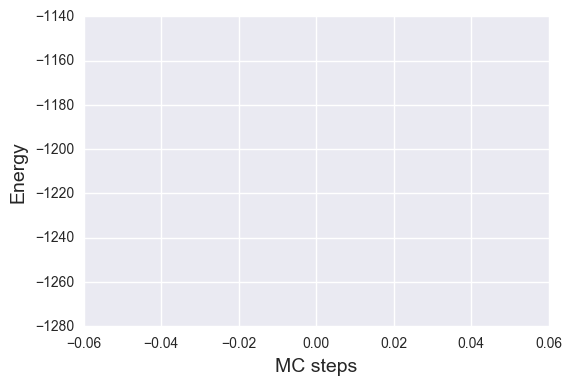

In [26]:
fig, ax = plt.subplots()
for k,v in mc_villin.models.iteritems():
    ax.plot(v['score'])
    print v['seq'], v['score']
ax.set_ylabel('Energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)